# A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [1]:
import pandas as pd 
%matplotlib inline

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [2]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", na_values=["Unknown"])

In [3]:
df.shape

(81937, 15)

## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [4]:
df.shape

(81937, 15)

In [5]:
df= df.head(n=30000)
df

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12
5,10013,Queen,F,Akita Crossbreed,NaN,Charcoal,Red,NaN,2013-04-01,No,NaN,Yes,2014-09-12 16:14:48.487,2014-09-12,2017-09-12
6,10035,Paige Sable Orta,F,American Pit Bull Mix / Pit Bull Mix,NaN,White,Gray,NaN,2014-07-01,No,NaN,No,2014-09-12 16:22:54.113,2014-09-12,2017-09-12
7,10465,Yogi,M,Boxer,NaN,TAN,BLACK,NaN,2010-09-01,Yes,No,Yes,2014-09-12 16:47:35.317,2014-09-12,2017-10-02
8,10013,Chewbacca,F,Labrador Retriever Crossbreed,NaN,RED,NaN,NaN,2012-06-01,Yes,No,Yes,2014-09-12 17:42:56.647,2014-09-12,2019-10-01
9,10013,IAN,M,NaN,GREYHOUND TER X,WHITE,BLACK,NaN,2006-01-01,Yes,No,Yes,2014-09-12 19:09:19.020,2014-09-12,2019-10-30


## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [6]:
#each row is a dog's informations and credentials. 
#owner_zip_code is identification of each row
#The animal birth year is important and perhaps we can play around with it

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below.

In [7]:
#what breed of dog has the most licenses
#what zip code has the most dog licenses 
#calculate average license duration 
#what percentage of new york dogs are neutered 

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [8]:
#Primary Breed
df['Primary Breed'].value_counts().head(10)

Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Beagle                                   546
Name: Primary Breed, dtype: int64

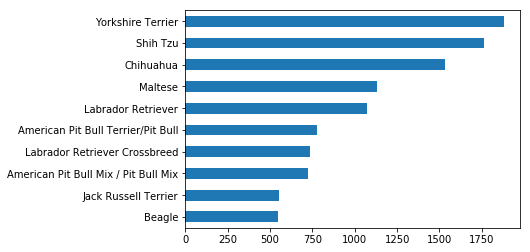

In [9]:
df['Primary Breed'].value_counts(ascending=True).tail(10).plot('barh')

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

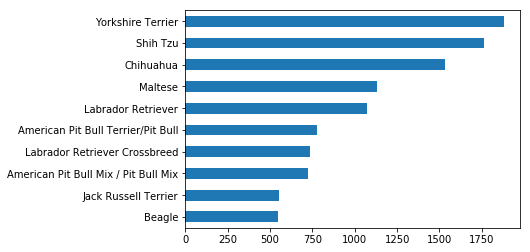

In [10]:
df[df['Primary Breed'] != 'Unknown']['Primary Breed'].value_counts(ascending=True).tail(10).plot('barh')

In [11]:
dogs_not_unknown = df[df['Primary Breed'] != 'Unknown']
#Turns out there is no need for that but we will keep it for the sake of.... stuff


## What are the most popular dog names?

In [12]:
df[df['Animal Name'] != "UNKNOWN"]['Animal Name'].value_counts().head(10)

Max        202
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Lucky      106
Daisy       90
Name: Animal Name, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [13]:
df[df['Animal Name'] == "Max"]['Animal Name'].value_counts()

Max    202
Name: Animal Name, dtype: int64

In [14]:
df[df['Animal Name']== "Maxwell"]['Animal Name'].value_counts()

Maxwell    11
Name: Animal Name, dtype: int64

In [15]:
df[df['Animal Name']== "Amanda"]['Animal Name'].value_counts()

Amanda    1
Name: Animal Name, dtype: int64

In [16]:
df[df['Animal Name']== "Yiannis"]['Animal Name'].value_counts() #:( 

Series([], Name: Animal Name, dtype: int64)

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [17]:
#Guard or Trained
df['Guard or Trained'].value_counts(normalize= True)

No     0.999143
Yes    0.000857
Name: Guard or Trained, dtype: float64

## What are the actual numbers?

In [18]:
df['Guard or Trained'].value_counts()

No     19809
Yes       17
Name: Guard or Trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [19]:
df.shape

(30000, 15)

In [20]:
df['Guard or Trained'].count()

19826

In [21]:
df['Guard or Trained'].value_counts(dropna=False)

No     19809
NaN    10174
Yes       17
Name: Guard or Trained, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [57]:
df['Guard or Trained'].str.replace("Unknown", "No").value_counts(dropna=False)

No     19809
NaN    10174
Yes       17
Name: Guard or Trained, dtype: int64

In [60]:
df['Guard or Trained'].fillna("No").value_counts()

No     29983
Yes       17
Name: Guard or Trained, dtype: int64

## What are the top dog breeds for guard dogs? 

In [23]:
#Primary Breed #Guard or Trained
guard =df[df['Guard or Trained'] == "Yes"]


,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
2363,10014,Truman,M,NaN,Chinese Crested/terrier,WHITE,BLACK,GRAY,2010-12-01,Yes,Yes,Yes,2015-03-05 01:31:07.200,2015-03-05,2019-02-16
2702,10014,Bojangles Swagu Rosenberg,M,"Poodle, Standard",NaN,Apricot,Blond,Tan,2014-03-01,Yes,Yes,Yes,2015-03-23 18:42:30.120,2015-03-23,2020-05-15
2871,11361,Dorofey,M,NaN,black russian terrier,BLACK,NaN,NaN,2010-01-01,No,Yes,Yes,2015-03-27 12:17:32.927,2015-03-27,2016-05-08
3065,10033,CLARA,F,NaN,American Fox Hound,WHITE,GOLD,NaN,1999-01-01,Yes,Yes,No,2015-03-31 14:55:38.243,2015-03-31,2016-05-30
3274,10301,Mia,F,German Shepherd Dog,NaN,Black,Tan,White,2003-01-01,Yes,Yes,Yes,2015-04-06 15:38:01.500,2015-04-06,2016-04-29
5231,11209,Lilly,F,German Shepherd Crossbreed,NaN,TAN,BLACK,NaN,2005-03-01,No,Yes,Yes,2015-05-01 08:54:03.193,2015-05-01,2016-06-09
10082,10014,Jasper,M,Labrador Retriever,NaN,FAWN,BLOND,CREAM,2006-10-01,Yes,Yes,Yes,2015-06-01 11:22:29.337,2015-06-01,2016-07-07
11897,10304,Rox,M,German Shepherd Dog,NaN,BLACK,TAN,NaN,2009-01-01,No,Yes,Yes,2015-06-10 14:02:05.327,2015-06-10,2016-08-02
11925,10308,Princess,F,Doberman Pinscher,NaN,BROWN,NaN,NaN,2006-01-01,No,Yes,Yes,2015-06-10 15:28:52.487,2015-06-10,2016-06-29
15044,10040,Nicky,M,Shih Tzu,NaN,WHITE,GOLD,GRAY,2002-10-01,Yes,Yes,Yes,2015-06-22 17:59:57.093,2015-06-22,2016-07-09


In [24]:
guard['Primary Breed'].value_counts().head()



German Shepherd Dog     3
Yorkshire Terrier       1
Schnauzer, Miniature    1
Doberman Pinscher       1
Golden Retriever        1
Name: Primary Breed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [53]:
df['year']= df['Animal Birth'].apply(lambda birth: birth.year)


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [26]:
df['age']= 2017- df['year']
df.head(10)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,10
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,4
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,3
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,9
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,3
5,10013,Queen,F,Akita Crossbreed,NaN,Charcoal,Red,NaN,2013-04-01,No,NaN,Yes,2014-09-12 16:14:48.487,2014-09-12,2017-09-12,2013,4
6,10035,Paige Sable Orta,F,American Pit Bull Mix / Pit Bull Mix,NaN,White,Gray,NaN,2014-07-01,No,NaN,No,2014-09-12 16:22:54.113,2014-09-12,2017-09-12,2014,3
7,10465,Yogi,M,Boxer,NaN,TAN,BLACK,NaN,2010-09-01,Yes,No,Yes,2014-09-12 16:47:35.317,2014-09-12,2017-10-02,2010,7
8,10013,Chewbacca,F,Labrador Retriever Crossbreed,NaN,RED,NaN,NaN,2012-06-01,Yes,No,Yes,2014-09-12 17:42:56.647,2014-09-12,2019-10-01,2012,5
9,10013,IAN,M,NaN,GREYHOUND TER X,WHITE,BLACK,NaN,2006-01-01,Yes,No,Yes,2014-09-12 19:09:19.020,2014-09-12,2019-10-30,2006,11


# Joining data together

In [27]:
#ok

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [28]:
df1=pd.read_csv("zipcodes-neighborhoods.csv")
df1.head()

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx


In [29]:
df_combined = df.merge(df1, left_on="Owner Zip Code", right_on="zip")

In [30]:
df_combined

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,zip,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,10,Upper West Side,10024,Manhattan
1,10024,Louie,M,NaN,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,9,Upper West Side,10024,Manhattan
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,6,Upper West Side,10024,Manhattan
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,NaN,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,6,Upper West Side,10024,Manhattan
4,10024,Harlen,M,NaN,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,No,Yes,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,10,Upper West Side,10024,Manhattan
5,10024,Barney,M,Beagle,NaN,BROWN,WHITE,ORANGE,2004-06-01,Yes,No,Yes,2014-09-29 15:58:56.570,2014-09-29,2016-10-01,2004,13,Upper West Side,10024,Manhattan
6,10024,Peyton,M,NaN,Black Mouth Cur,BRINDLE,BLACK,NaN,2012-08-01,Yes,No,Yes,2014-10-02 11:23:37.220,2014-10-02,2016-09-24,2012,5,Upper West Side,10024,Manhattan
7,10024,Phoebe,F,Cavalier King Charles Spaniel,NaN,GOLD,APRICOT,WHITE,2009-01-01,Yes,No,Yes,2014-10-06 15:13:32.223,2014-10-06,2016-10-25,2009,8,Upper West Side,10024,Manhattan
8,10024,Baci,F,Dachshund,NaN,Black,Tan,NaN,2013-02-01,Yes,NaN,Yes,2014-10-06 20:05:14.213,2014-10-06,2016-10-06,2013,4,Upper West Side,10024,Manhattan
9,10024,Delilah Eddy,F,German Shepherd Crossbreed,NaN,BLACK,TAN,NaN,2007-05-01,Yes,No,Yes,2014-10-09 13:55:43.907,2014-10-09,2019-10-11,2007,10,Upper West Side,10024,Manhattan


In [31]:
df_combined.neighborhood.value_counts()

Upper West Side                  2000
Upper East Side                  1851
Northwest Brooklyn               1716
Chelsea and Clinton              1533
South Shore                      1375
Lower East Side                  1149
West Queens                      1141
Gramercy Park and Murray Hill    1002
West Central Queens               984
Southeast Bronx                   925
Northwest Queens                  850
Southern Brooklyn                 839
Southwest Brooklyn                811
North Queens                      766
Inwood and Washington Heights     752
Greenwich Village and Soho        740
Central Brooklyn                  715
Southwest Queens                  683
Borough Park                      639
Bushwick and Williamsburg         613
Stapleton and St. George          562
Greenpoint                        538
Central Harlem                    534
Canarsie and Flatlands            531
Mid-Island                        486
East Harlem                       482
Flatbush    

In [32]:
df_combined.borough.value_counts().head().sort_values()

Staten Island     2727
Bronx             2748
Queens            6154
Brooklyn          7466
Manhattan        10478
Name: borough, dtype: int64

In [34]:
breed_unknown = df_combined[df_combined["Primary Breed"] != "Unknown"]

## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [35]:
df_combined.groupby("borough")['Animal Name'].value_counts().groupby(level=0).head(1)

borough        Animal Name
Bronx          Bella           22
Brooklyn       Max             46
Manhattan      UNKNOWN        107
Queens         Max             50
Staten Island  Max             27
Name: Animal Name, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [36]:
df_combined.groupby('neighborhood')["Primary Breed"].value_counts(dropna=True).groupby(level=0).head(1).sort_values(ascending=False)

neighborhood                   Primary Breed                       
Upper West Side                Labrador Retriever                      121
West Queens                    Shih Tzu                                 95
Upper East Side                Havanese                                 94
South Shore                    Shih Tzu                                 90
Southern Brooklyn              Yorkshire Terrier                        85
Southeast Bronx                Shih Tzu                                 83
Chelsea and Clinton            Chihuahua                                80
Lower East Side                Chihuahua                                77
Northwest Brooklyn             Labrador Retriever                       72
West Central Queens            Yorkshire Terrier                        72
Southwest Brooklyn             Shih Tzu                                 69
Northwest Queens               Chihuahua                                62
Canarsie and Flatlands         S

## What breed of dogs are the least likely to be spayed? Male or female?

In [54]:
df[df["Spayed or Neut"] == 'No']["Primary Breed"].value_counts()

Yorkshire Terrier                       537
Shih Tzu                                405
Maltese                                 306
Chihuahua                               306
American Pit Bull Terrier/Pit Bull      173
Pomeranian                              148
German Shepherd Dog                     125
Labrador Retriever                      113
Golden Retriever                        111
Cocker Spaniel                           97
Shiba Inu                                95
French Bulldog                           90
American Pit Bull Mix / Pit Bull Mix     86
Jack Russell Terrier                     81
Havanese                                 80
Cavalier King Charles Spaniel            76
Siberian Husky                           74
Boston Terrier                           73
Bull Dog, English                        72
Poodle, Toy                              70
Beagle                                   70
Pug                                      69
Shih Tzu Crossbreed             

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [38]:
colors = ["Black", "BLACK", "White", "WHITE", "Grey", "Grey", "Gray", "GRAY"]

In [39]:
df["monochrome"] = (df['Animal Dominant Color'].isin(colors) & (df["Animal Secondary Color"].isnull()) & (df["Animal Third Color"].isnull()))

In [40]:
df['monochrome'].value_counts()

False    25865
True      4135
Name: monochrome, dtype: int64

In [41]:
df.monochrome.value_counts()

False    25865
True      4135
Name: monochrome, dtype: int64

## How many dogs are in each borough? Plot it in a graph.

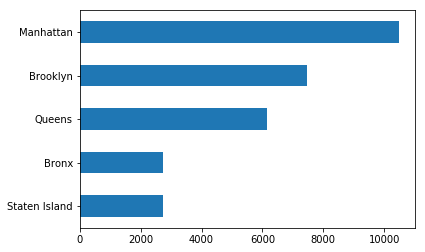

In [42]:
df_combined.borough.value_counts().sort_values().plot(kind= "barh")

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [43]:
df2=pd.read_csv("boro_population.csv")
df2


,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [44]:
df_combined1 = df_combined.merge(df2, left_on="borough", right_on="borough")

In [55]:
per_capita = df_combined1.borough.value_counts() / df_combined1.population

/usr/local/lib/python3.6/site-packages/pandas/core/indexes/base.py:3033: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


In [46]:
 df_combined1.borough.value_counts()

Manhattan        10478
Brooklyn          7466
Queens            6154
Bronx             2748
Staten Island     2727
Name: borough, dtype: int64

In [47]:
df2.set_index('borough')['population']

borough
Manhattan        1644518
Bronx            1455444
Brooklyn         2636735
Queens           2339150
Staten Island     474558
Name: population, dtype: int64

In [48]:
round(df_combined1.borough.value_counts() / df2.set_index('borough')['population'] * 1000)

Bronx            2.0
Brooklyn         3.0
Manhattan        6.0
Queens           3.0
Staten Island    6.0
dtype: float64

In [49]:
df_combined1


,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,...,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,zip,borough,population,area_sqmi
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,...,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,10,Upper West Side,10024,Manhattan,1644518,23
1,10024,Louie,M,NaN,Coonhound,Black,White,Brown,2008-05-01,Yes,...,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,9,Upper West Side,10024,Manhattan,1644518,23
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,...,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,6,Upper West Side,10024,Manhattan,1644518,23
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,...,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,6,Upper West Side,10024,Manhattan,1644518,23
4,10024,Harlen,M,NaN,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,...,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,10,Upper West Side,10024,Manhattan,1644518,23
5,10024,Barney,M,Beagle,NaN,BROWN,WHITE,ORANGE,2004-06-01,Yes,...,2014-09-29 15:58:56.570,2014-09-29,2016-10-01,2004,13,Upper West Side,10024,Manhattan,1644518,23
6,10024,Peyton,M,NaN,Black Mouth Cur,BRINDLE,BLACK,NaN,2012-08-01,Yes,...,2014-10-02 11:23:37.220,2014-10-02,2016-09-24,2012,5,Upper West Side,10024,Manhattan,1644518,23
7,10024,Phoebe,F,Cavalier King Charles Spaniel,NaN,GOLD,APRICOT,WHITE,2009-01-01,Yes,...,2014-10-06 15:13:32.223,2014-10-06,2016-10-25,2009,8,Upper West Side,10024,Manhattan,1644518,23
8,10024,Baci,F,Dachshund,NaN,Black,Tan,NaN,2013-02-01,Yes,...,2014-10-06 20:05:14.213,2014-10-06,2016-10-06,2013,4,Upper West Side,10024,Manhattan,1644518,23
9,10024,Delilah Eddy,F,German Shepherd Crossbreed,NaN,BLACK,TAN,NaN,2007-05-01,Yes,...,2014-10-09 13:55:43.907,2014-10-09,2019-10-11,2007,10,Upper West Side,10024,Manhattan,1644518,23


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

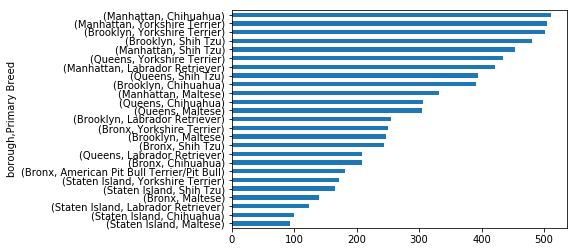

In [50]:
df_combined.groupby('borough')["Primary Breed"].value_counts(dropna=True).groupby(level=0).head(5).sort_values(ascending=True).plot(kind= "barh")

## What percentage of dogs are not guard dogs?

In [61]:
df['Guard or Trained'].fillna("No").value_counts(normalize= True) * 100

No     99.943333
Yes     0.056667
Name: Guard or Trained, dtype: float64